In [1]:
import sys
sys.path.insert(0, "../")
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import time
import sdp_mrf
from sdp_mrf.models import PottsModel

In [2]:
# Load the data
coupling_data = np.load("../data/4_class_coupling_data.npy")
bias_data = np.load("../data/4_class_bias.npy")
logZ_data = np.load("../data/4_class_logZ.npy")
cw_len = coupling_data.shape[-2]
num = coupling_data.shape[-1]
k = bias_data.shape[1]
n = coupling_data.shape[0]
print(n, k)

8 4


In [4]:
# Run our algorithm for all the problem instances
sdp_r = []
t_list = []
rounding_iters = 5000
model = PottsModel()
for i in range(cw_len):
    diff_sdp_r = []
    for sample in range(10):
        print("CW =", i, " Sample number =", sample, end="\r")
        A = coupling_data[:, :, i, sample]
        h = bias_data[:, :, i, sample]
        ground_truth = logZ_data[i, sample]
        model.set_model_parameters(A, h, k)
        s = time.time()
        rounded_logZ = model.solve_partition_function(solver='M4', rounding_iters=rounding_iters)
        t_list.append(time.time() - s)
        diff_sdp_r.append(np.abs(ground_truth - rounded_logZ))
    sdp_r.append(np.mean(diff_sdp_r))

In [6]:
# Set AIS parameters (T, num_cycles, num_samples_ais)
T = 3
num_cycles = 1
num_samples_ais = 500

# Run AIS on all problem instances
t_list = []
ais_error = []
for cw in range(cw_len):
    diff_ais = []
    for sample in range(10):
        print("CW =", cw, " Sample number =", sample, end="\r")
        A = coupling_data[:, :, cw, sample]
        h = bias_data[:, :, cw, sample]
        ground_truth = logZ_data[cw, sample]
        model.set_model_parameters(A, h, k)
        s = time.time()
        ais_estimate = model.solve_partition_function(solver='AIS', num_samples=num_samples_ais,
                                                      T=T, num_cycles=num_cycles)
        t_list.append(time.time() - s)
        diff_ais.append(np.abs(ground_truth - ais_estimate))
    ais_error.append(np.mean(diff_ais))

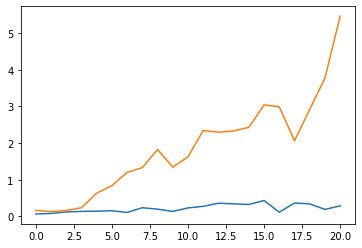

In [7]:
plt.plot(sdp_r)
plt.plot(ais_error)